# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [147]:
import numpy as np
import matplotlib.pyplot as plt



from math import sqrt, atan


from sympy.interactive import printing
printing.init_printing(use_latex=True)

from sympy import *
from numpy import *
from matplotlib import *
from scipy import *
from scipy.integrate import solve_ivp

from sympy import symbols
from sympy.plotting import plot

In [126]:
import sympy as sym
x,y,z,w,g,x1= sym.symbols("x,y,z,w,g,x0")


In [127]:
y = Function('y')
z = Function ("z")
w = Function ("w")
g = Function ("g")

In [128]:
y=cos(x)
y

In [129]:
z=sin(x)
z

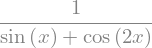

In [130]:
w= 1/(sin(x)+cos(2*x))
w

b)

In [131]:
g=y*z
Derivative(g).doit()

c)

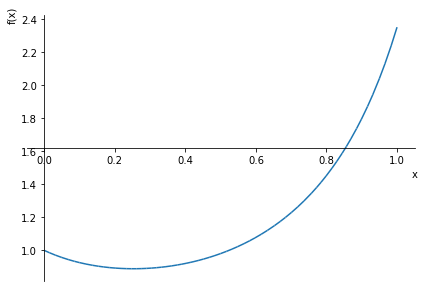

In [132]:
graf=plot(w,(x,0,1))
graf

d)

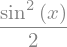

In [133]:
integrate(g,x)

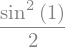

In [134]:
integrate( g, (x, 0,1))

e)

In [135]:
limit(y,x,0)

In [136]:
limit(z,x,0)

In [137]:
limit(g,x,0)

In [138]:
limit(w,x,0)

e)

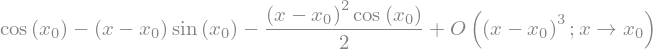

In [139]:
y.series(x,x1,3)

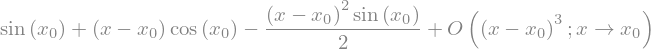

In [140]:
z.series(x,x1,3)

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [185]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [209]:
a=.13
b=.2
c=6.5
es=[x,y,z]
def rossler(es,tim):
    dx=-(es[1])-es[2]
    dy=es[0]+a*es[1]
    dz=b+es[2]*(es[0]-c)
    return np.array([dx,dy,dz])

In [210]:
x0=0
y0=0
z0=0
dt=50/float(99)

In [211]:
tim=np.linspace(0,50,100)
y=np.empty([100,3])
x0=[0,0]
y0=[0,1]
z0=[0,2]


(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

/tmp/ipykernel_499/700823695.py:8: RuntimeWarning: overflow encountered in double_scalars
  dz=b+es[2]*(es[0]-c)
/tmp/ipykernel_499/1954147263.py:4: RuntimeWarning: invalid value encountered in add
  y_next = y + 0.5*(k0 + k1)


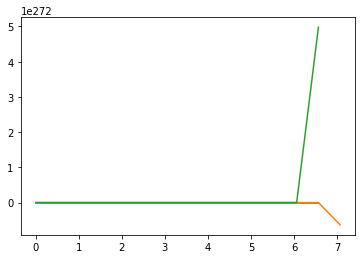

In [212]:
for i in range (99):
    y[i+1]=RK2(y[i],tim[i],dt,rossler)
    exdat=[y[i,0]for i in range(100)]  
yedat=[y[i,1]for i in range (100)]
zedat=[y[i,2]for i in range (100)]
plt.plot(tim,exdat)
plt.plot(tim,yedat)
plt.plot(tim,zedat)
    

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [213]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm